In [43]:
# imports
import numpy as np
import json

# modelling
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# misc
import os

In [44]:
# function to load and preprocess quickdraw data
def load_quickdraw_data(dir, category_name, n_samples=1000):
    file = f'full_numpy_bitmap_{category_name}.npy'
    data = np.load(dir + file)
    if n_samples == -1:
        return data
    else:
        indices = np.random.choice(len(data), n_samples, replace=False)
        sampled_data = data[indices]
        return sampled_data

In [45]:
def data_generator(data, batch_size=512):
    n_samples = len(data)
    for i in range(0, n_samples, batch_size):
        batch = data[i:i + batch_size]
        yield batch

In [46]:
files = os.listdir('../data/')
categories = [file.split('_')[-1].split('.')[0] for file in files]

In [47]:
# Data directory
dir = '../data/'

# Load and preprocess data
all_data = []
labels = []

In [48]:
for category_name in categories:
    category_data = load_quickdraw_data(dir, category_name, 100) # Change this to -1 for all data
    all_data.extend(category_data)
    labels.extend([category_name] * len(category_data))

In [49]:
# split the data into training and test
x_train, x_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.2, random_state=42)

print(len(all_data))

34500


In [87]:
print(x_train.shape)
print(x_test.shape)

(27600, 784)
(6900, 784)


In [50]:
# normalize data
x_train = np.array(x_train).astype(np.float32) / 255
x_test = np.array(x_test).astype(np.float32) / 255

In [51]:
# Train the LOF model using data generator
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.05)

# List to store anomaly scores
anomaly_scores = []

for batch in data_generator(x_train):
    # Train the LOF model
    lof.fit(batch)
    # Get the negative outlier factor scores for each sample in the batch
    batch_scores = -lof.negative_outlier_factor_
    anomaly_scores.extend(batch_scores)

In [52]:
# Predict anomalies using data generator
y_pred = []

for batch in data_generator(x_test):
    # Predict anomalies for the current batch
    batch_pred = lof.fit_predict(batch)
    y_pred.extend(batch_pred)

In [53]:
print(y_pred)
y_pred = np.array(y_pred)

[1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [54]:
# Get anomaly indexes
anomaly_indexes = np.where(y_pred == -1)[0]

# Display the anomaly indices
print("Anomaly Indexes:", anomaly_indexes)
print(len(anomaly_indexes))

Anomaly Indexes: [   4    7   77   94  118  132  136  139  143  173  228  239  241  264
  287  294  309  387  429  436  456  477  487  492  503  510  521  533
  590  623  635  642  681  682  701  713  726  743  749  755  777  831
  837  839  847  872  892  903  949  958 1014 1020 1075 1077 1081 1083
 1130 1137 1145 1146 1163 1180 1203 1226 1239 1297 1331 1351 1355 1369
 1375 1452 1456 1462 1467 1490 1505 1506 1538 1556 1589 1591 1594 1600
 1644 1649 1680 1717 1718 1731 1745 1759 1766 1779 1800 1806 1860 1866
 1887 1914 1940 1965 2013 2025 2050 2052 2056 2080 2118 2149 2182 2200
 2232 2255 2258 2266 2287 2336 2343 2416 2436 2480 2482 2487 2502 2518
 2532 2536 2546 2548 2563 2572 2594 2601 2602 2619 2628 2635 2650 2701
 2716 2717 2746 2789 2854 2887 2888 2908 2912 2925 2934 2952 3018 3039
 3048 3061 3073 3084 3109 3160 3196 3201 3213 3221 3226 3251 3268 3270
 3289 3340 3352 3377 3385 3387 3402 3419 3431 3461 3470 3532 3558 3579
 3589 3630 3649 3712 3715 3740 3784 3787 3814 3834 3859 3879

In [55]:
# Convert the list of anomaly indexes to a NumPy array
anomaly_indexes_array = np.array(anomaly_indexes, dtype=int)

# Extract labels of anomalies
anomaly_labels = [y_test[i] for i in anomaly_indexes_array]

# Display the anomaly labels
print("Anomaly Labels:", anomaly_labels)

Anomaly Labels: ['bracelet', 'helicopter', 'tractor', 'zebra', 'rabbit', 'bear', 'hourglass', 'drill', 'elephant', 'hospital', 'stethoscope', 'bus', 'flashlight', 'toilet', 'purse', 'fireplace', 'butterfly', 'megaphone', 'birthday cake', 'stop sign', 'onion', 'snorkel', 't-shirt', 'barn', 'fan', 'panda', 'toilet', 'horse', 'castle', 'chair', 'helmet', 'radio', 'goatee', 'rain', 'backpack', 'scissors', 'bear', 'peas', 'ice cream', 'snail', 'swan', 'bicycle', 'panda', 'sock', 'binoculars', 'frying pan', 'diving board', 'angel', 'elephant', 'mushroom', 'butterfly', 'boomerang', 'pickup truck', 'tractor', 'leaf', 'crab', 'piano', 'purse', 'laptop', 'wheel', 'panda', 'soccer ball', 'parachute', 'diamond', 'flower', 'coffee cup', 'flower', 'bird', 'cake', 'pond', 'purse', 'jail', 'panda', 'stereo', 'grass', 'drums', 'goatee', 'key', 'rabbit', 'The Great Wall of China', 'stop sign', 'cactus', 'lantern', 'raccoon', 'toilet', 'book', 'house', 'star', 'squirrel', 'lobster', 'fan', 'drums', 'lapt

In [56]:
# Extract anomaly images from the test set
anomalies = [x_test[i] for i in anomaly_indexes_array]

print(len(anomalies))

351


In [57]:
# create a dict of indexes and labels
anomaly_dict = dict(zip(map(int, anomaly_indexes), anomaly_labels))

In [58]:
# write to json file
json_filename = "anomalies.json"
with open(json_filename, 'w') as json_file:
    json.dump(anomaly_dict, json_file)

print(f"Anomaly dictionary saved to {json_filename}")

Anomaly dictionary saved to anomalies.json


In [59]:
# Reshape the test data for plotting
x_test_reshaped = x_test.reshape(-1, 28, 28)

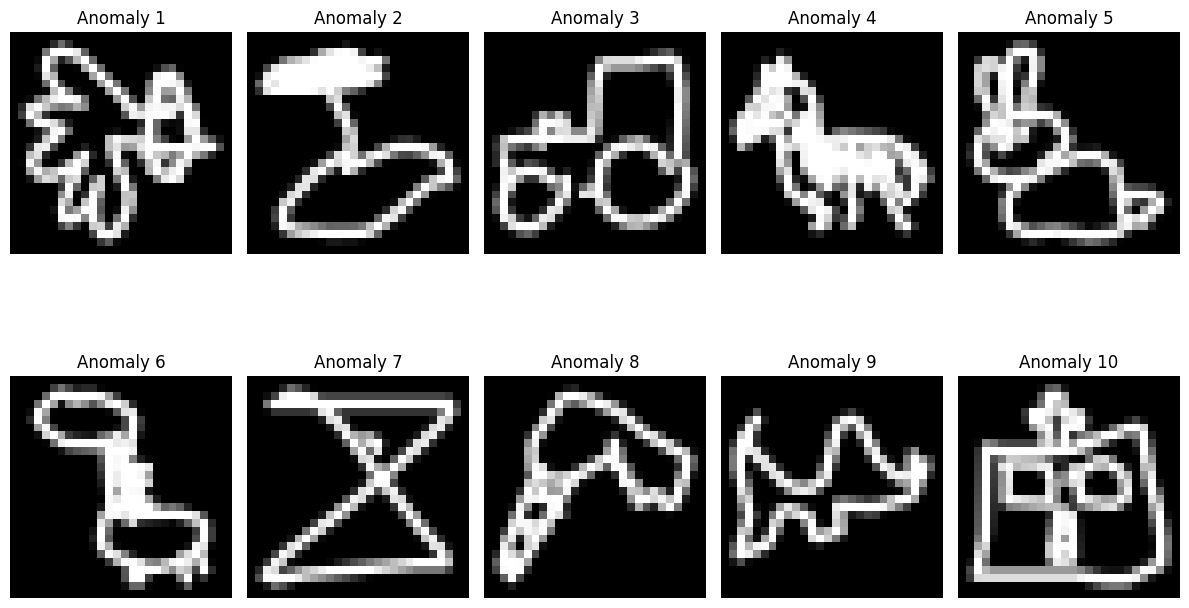

In [60]:
# Plot some of the anomalies
plt.figure(figsize=(12, 8))
for i, idx in enumerate(anomaly_indexes[:10]):  # Plot the first 10 anomalies
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test_reshaped[idx], cmap='gray')
    plt.title(f'Anomaly {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [62]:
anomaly_scores = np.array(anomaly_scores)

# Display the anomaly scores
print("Anomaly Scores:", anomaly_scores[anomaly_indexes])

Anomaly Scores: [1.1008513 1.0729754 1.0479476 ... 1.0164245 1.0489491 1.1259648]
Anomaly Scores: [1.0931022  1.2850808  1.0293977  1.1033798  1.1515188  1.1004072
 1.0748706  1.044444   1.001549   1.1763685  1.1149307  1.115185
 1.0740954  1.01778    1.0353967  1.2436149  1.3083174  1.1419783
 1.2011837  1.0641512  1.1173389  1.1653937  1.2131531  1.1179104
 1.0354979  1.2428162  1.1749177  1.1947069  1.0168304  1.2382325
 1.0262764  1.0479107  1.2824736  1.1195123  1.0011456  1.0986294
 1.2031883  1.1785843  0.99694043 1.0038825  1.0287066  1.0440322
 1.0608857  1.0258492  1.2401911  1.1305717  1.0674422  1.0005262
 1.1939099  1.0472066  1.1016997  1.0479187  1.2074549  1.021005
 1.1661714  1.1364558  1.0670464  1.094503   1.0719097  1.1054523
 0.98976934 1.1471498  1.0757303  1.0699282  1.1887096  1.1778257
 1.1414568  1.0058181  1.2306416  1.0425755  1.2111093  1.042057
 1.0081377  1.196965   1.0747459  1.309387   1.1017228  1.1828738
 1.0197508  0.98303306 1.2971332  1.0436381  1.

c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


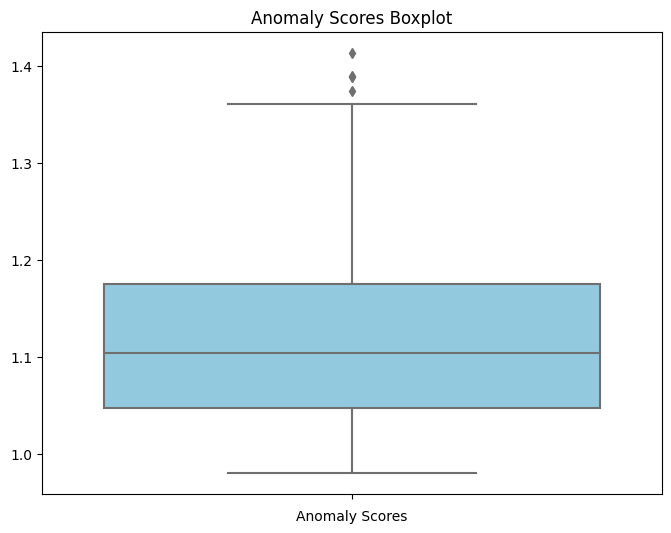

In [63]:
# Plot a boxplot of the reconstruction errors
plt.figure(figsize=(8, 6))
sns.boxplot(y=anomaly_scores[anomaly_indexes_array], color='skyblue')
plt.title('Anomaly Scores Boxplot')
plt.xlabel('Anomaly Scores')
plt.show()

In [75]:
# Threshold for classifying anomalies based on anomaly scores
threshold = np.percentile(anomaly_scores, 100 * (1 - 0.05))

# Create a set of unique labels
unique_labels = set(labels)
print(len(labels))

# Convert anomaly scores to binary predictions
binary_predictions = (anomaly_scores > threshold).astype(int)

34500


In [78]:
# Convert anomaly scores to binary predictions
binary_predictions = (y_pred == -1).astype(int)

# Convert y_test to binary format (1 for normal, -1 for anomalous)
y_true_binary = np.array([1 if label in unique_labels else -1 for label in y_test[:len(binary_predictions)]])

In [95]:
# Compute metrics
accuracy = accuracy_score(y_true_binary, binary_predictions)
precision = precision_score(y_true_binary, binary_predictions)
recall = recall_score(y_true_binary, binary_predictions)
f1 = f1_score(y_true_binary, binary_predictions)

In [96]:
# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.050869565217391305
Precision: 1.0
Recall: 0.050869565217391305
F1 Score: 0.09681423251965246


In [97]:
# Classification report
report = classification_report(binary_predictions , y_true_binary, target_names=['normal', 'anomaly'])

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00      6549
     anomaly       0.05      1.00      0.10       351

    accuracy                           0.05      6900
   macro avg       0.03      0.50      0.05      6900
weighted avg       0.00      0.05      0.00      6900



c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zippe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [100]:
# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(y_true_binary, y_pred)  # Note the negative y_pred for precision_recall_curve
pr_auc = auc(recall, precision)

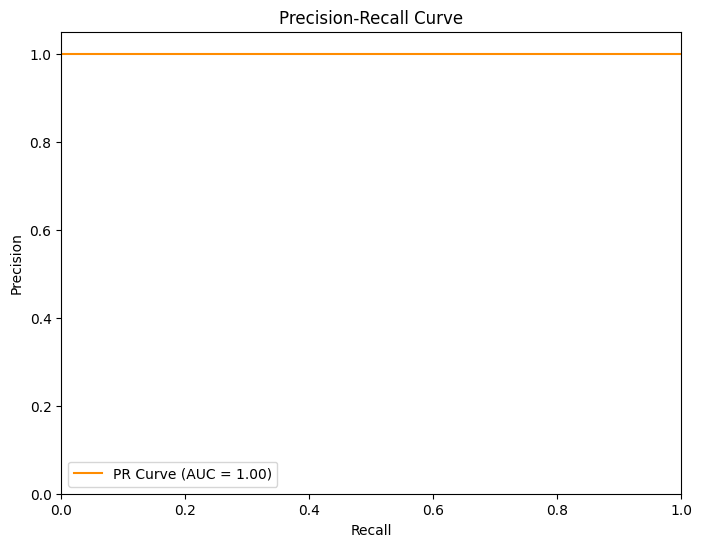

In [103]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', label='PR Curve (AUC = {:.2f})'.format(pr_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [104]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_binary, binary_predictions)

In [105]:
print(conf_matrix)

[[   0    0]
 [6549  351]]


In [106]:
tn, fp, fn, tp = conf_matrix.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 0
False Positives: 0
False Negatives: 6549
True Positives: 351
